In [2]:
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show(data, name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=data[:,2])
    ax.set_xlabel(name)

def load_points(file):
    names = ['t','intensity','id',
             'x','y','z',
             'azimuth','range','pid']

    formats = ['int64', 'uint8', 'uint8',
               'float32', 'float32', 'float32',
               'float32', 'float32', 'int32']

    binType = np.dtype( dict(names=names, formats=formats) )
    data = np.fromfile('objects/' + file, binType)

    P = np.vstack([ data['x'], data['y'], -data['z'] ]).T
    
    return P

In [3]:
# points = load_points('car.67.270.bin')
files = listdir('objects')
car_files = [s for s in files if "car" in s and "csv" not in s and "meta" not in s]

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


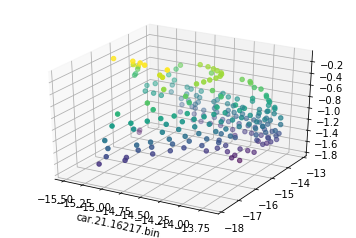

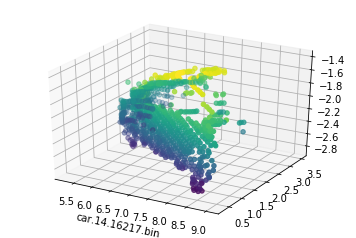

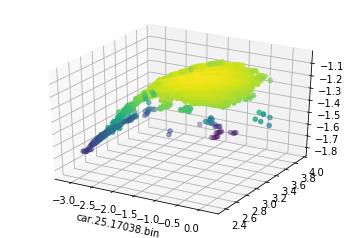

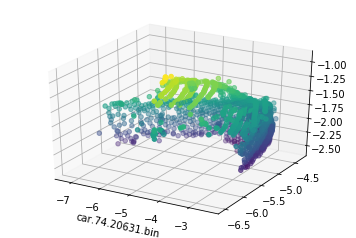

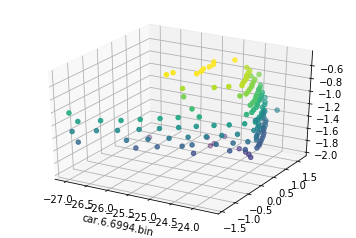

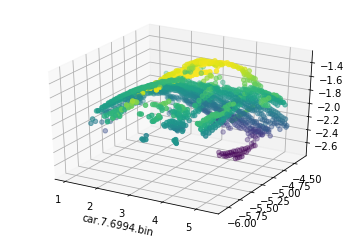

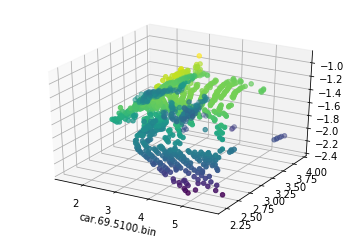

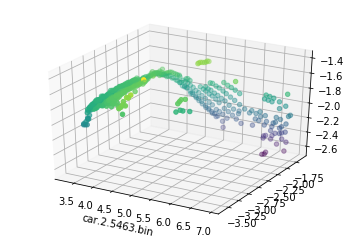

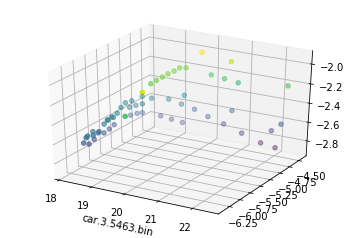

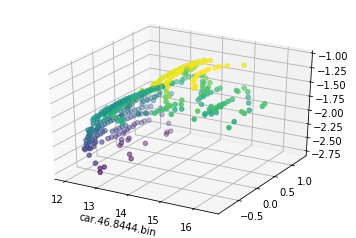

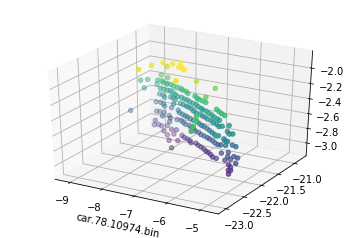

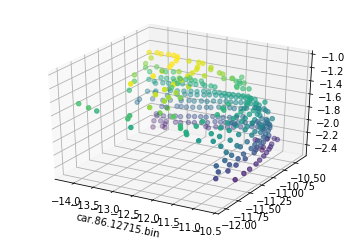

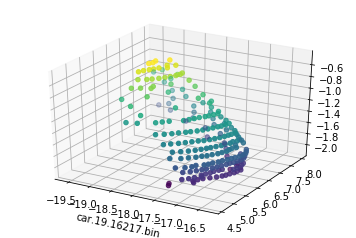

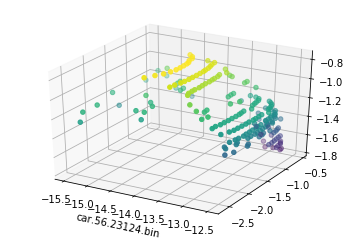

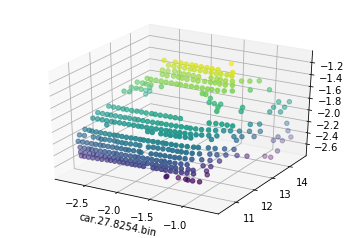

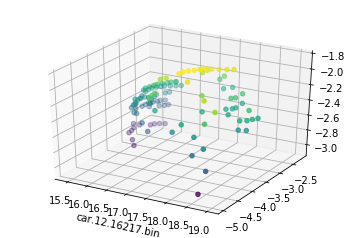

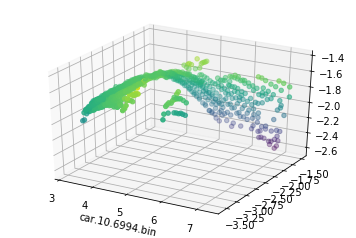

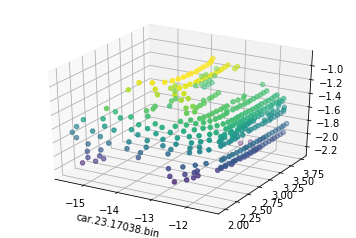

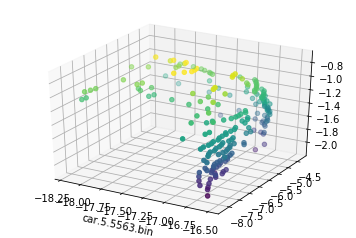

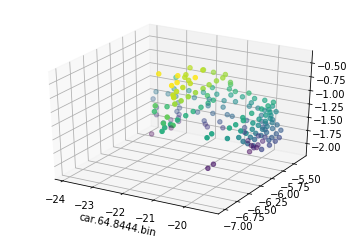

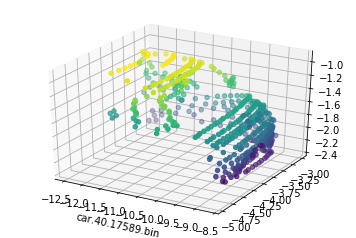

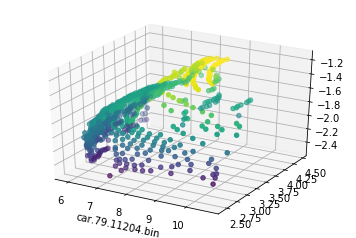

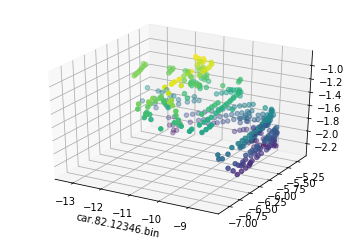

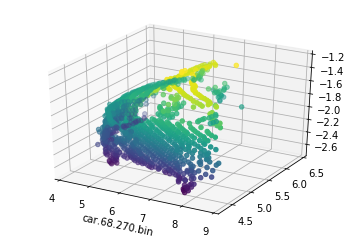

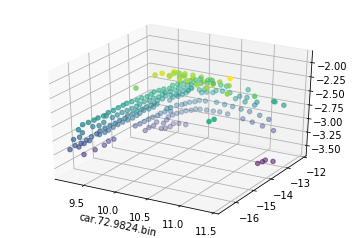

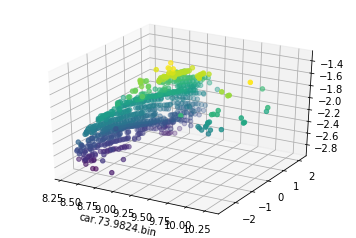

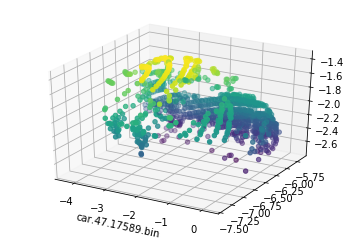

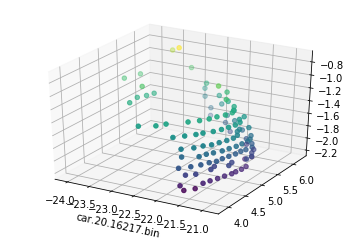

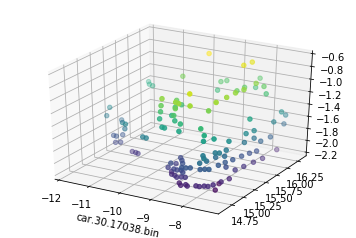

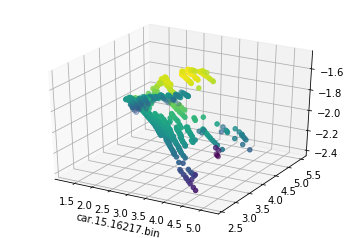

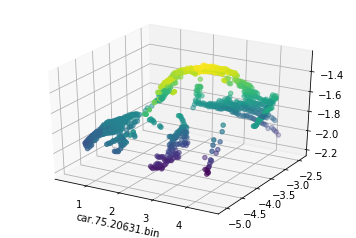

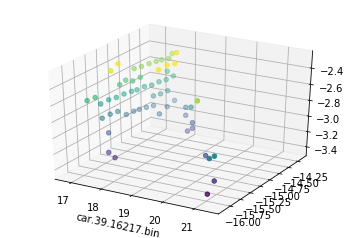

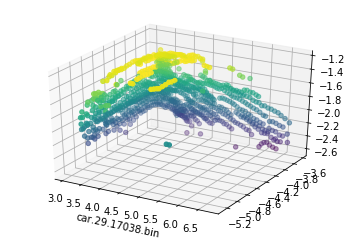

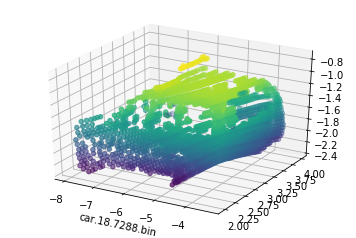

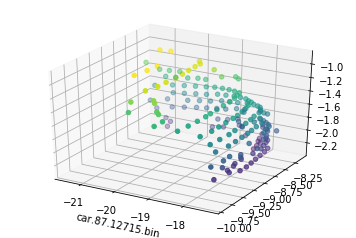

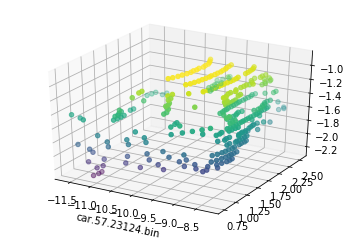

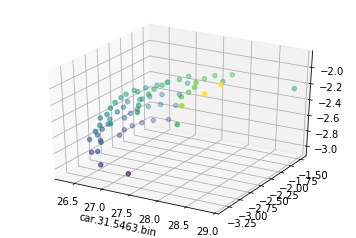

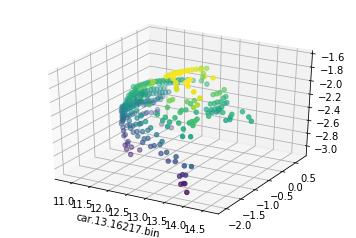

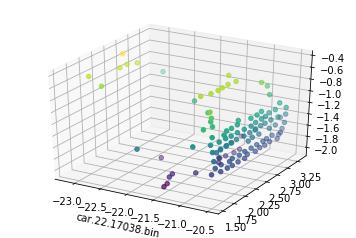

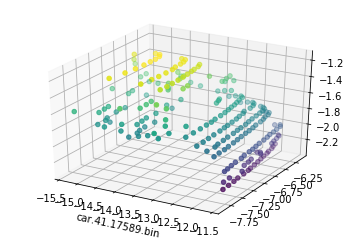

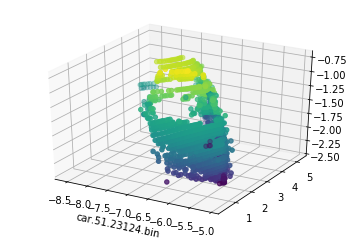

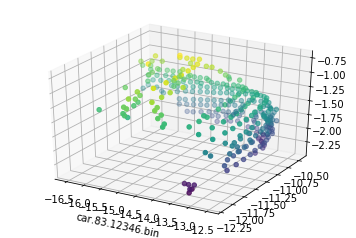

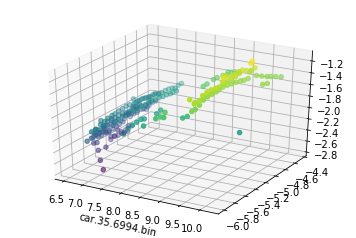

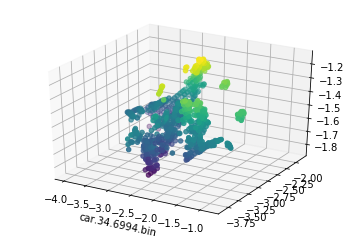

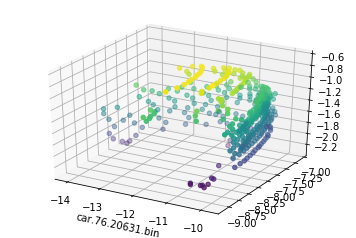

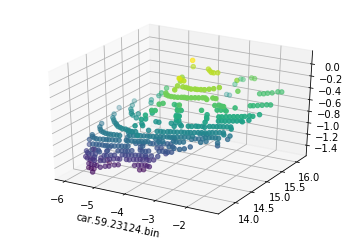

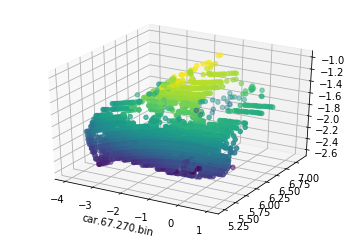

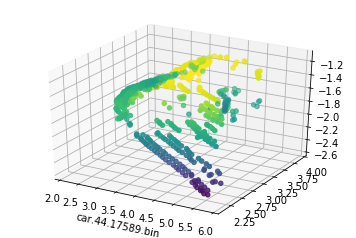

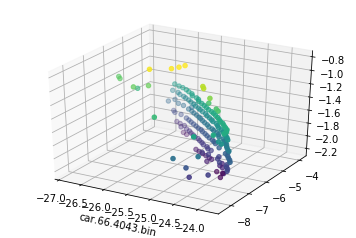

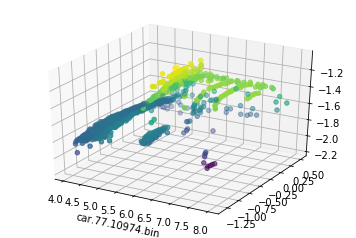

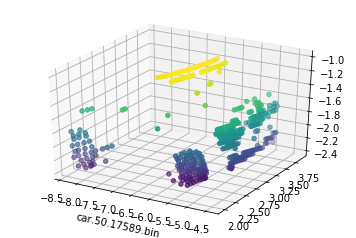

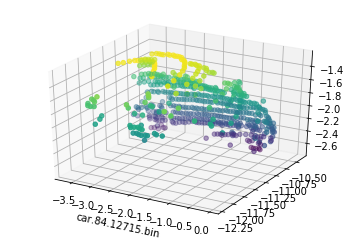

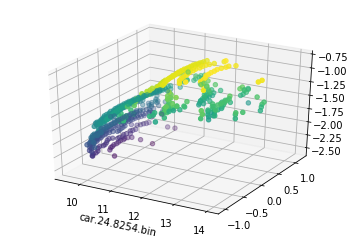

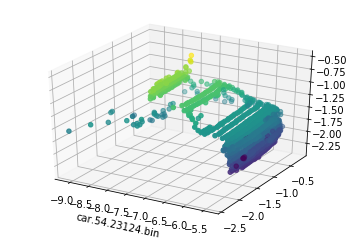

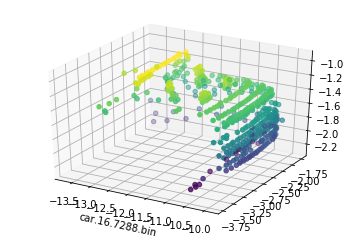

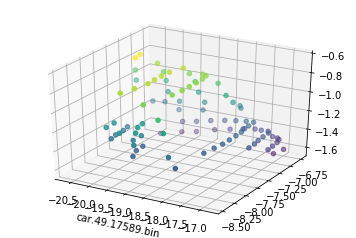

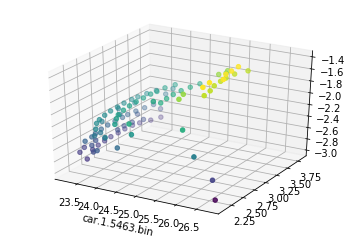

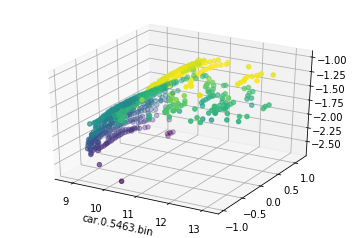

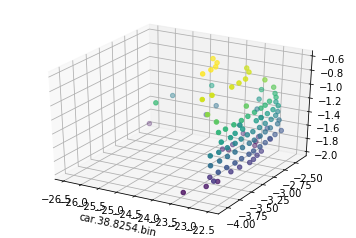

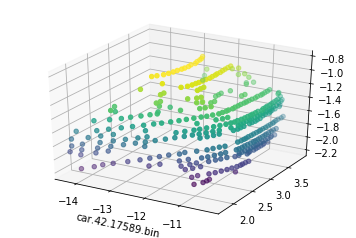

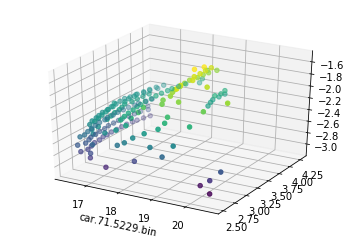

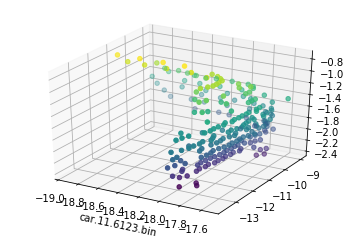

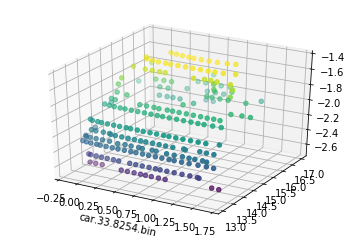

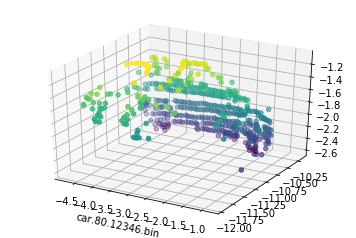

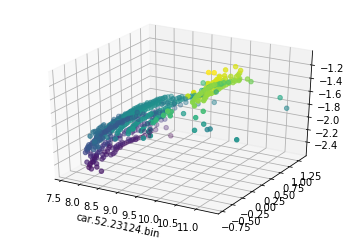

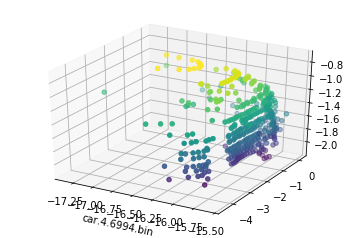

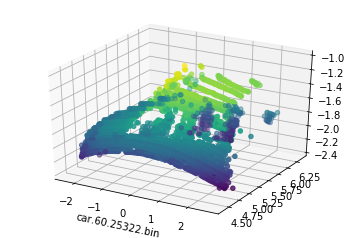

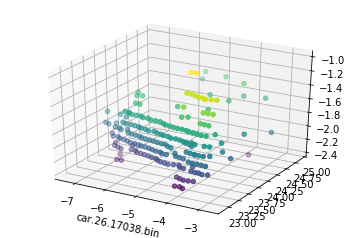

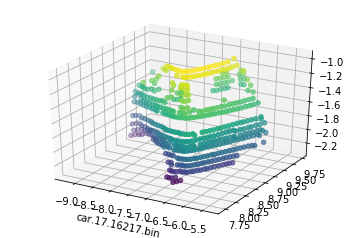

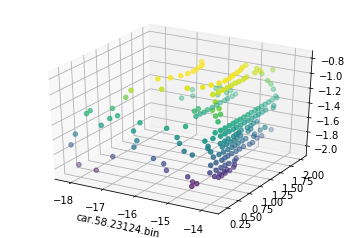

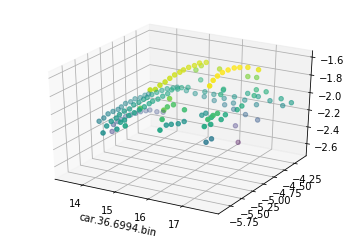

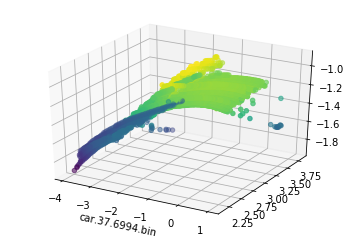

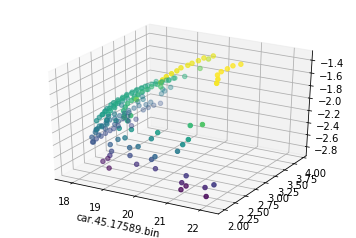

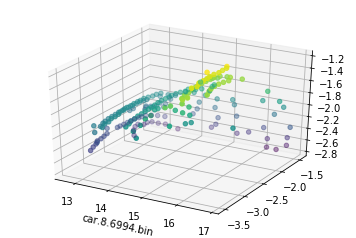

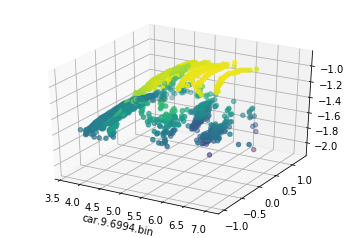

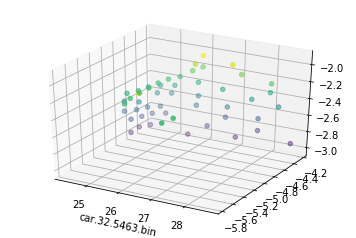

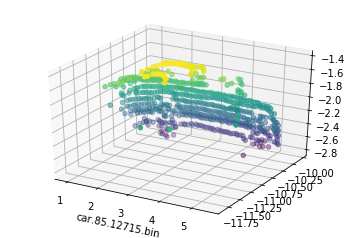

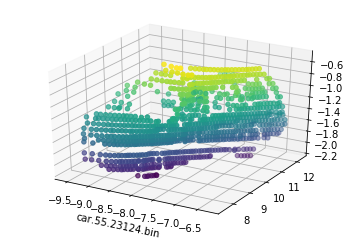

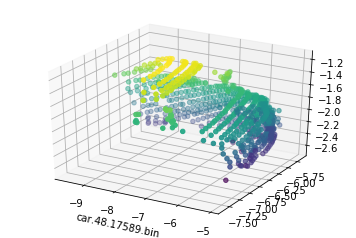

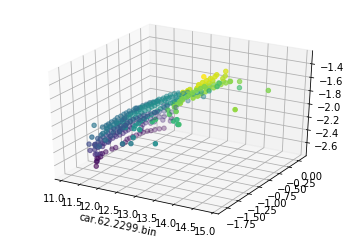

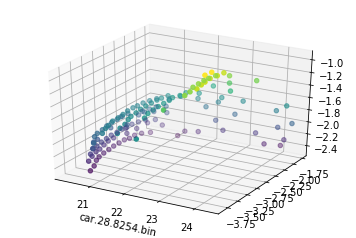

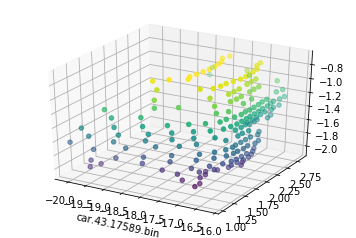

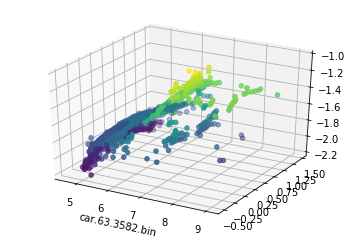

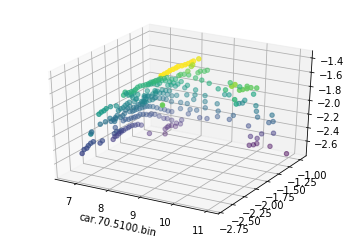

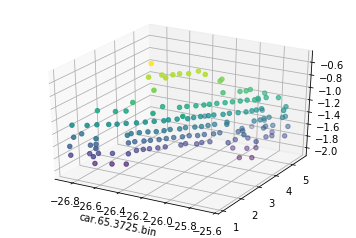

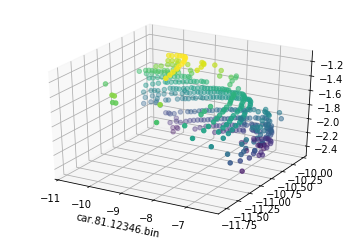

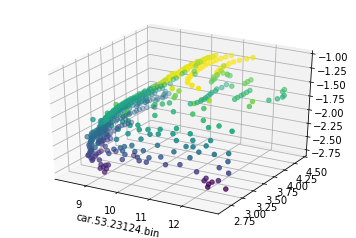

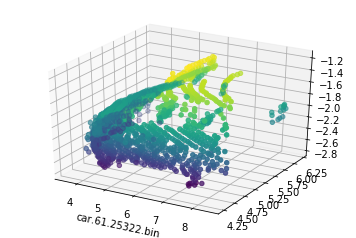

In [4]:
for i in car_files:
    points = load_points(i)
    show(points, i)

In [7]:
import h5py
from plyfile import PlyData, PlyElement

good_cars = ['car.74.20631.bin', 'car.27.8254.bin', 'car.40.17589.bin', 'car.79.11204.bin', 
             'car.68.270.bin', 'car.18.7288.bin', 'car.51.23124.bin', 'car.67.270.bin', 'car.84.12715.bin', 
             'car.55.23124.bin', 'car.61.25322.bin']

with h5py.File('sydney_cars.hdf5', 'w') as wfile:
    for index, i in enumerate(good_cars):
        group = wfile.create_group('id' + str(index))
        group['label'] = 1
        group['num0'] = load_points(i)

